### Open the file temperature_data.csv.

#### Using linear interpolation, find the temperature at hour 12.14
#### Using cubic interpolation, find the temperature at hour 12.14

Using cubic interpolation, find the temperature at hour 12.14 is 19.24715705749554


C:\Users\xsxwz\AppData\Local\Temp\ipykernel_13308\1216942092.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('data/temperature_data.csv',delim_whitespace=True)


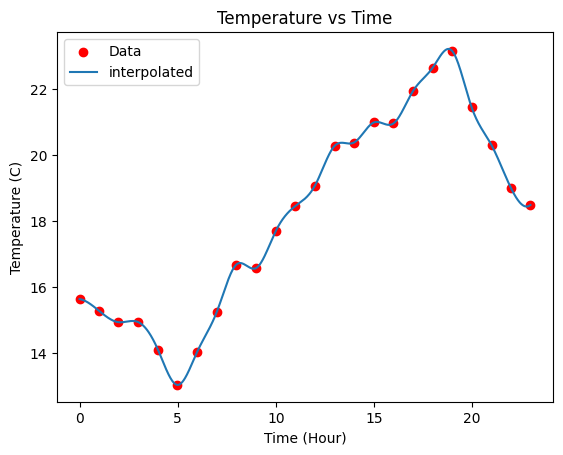

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

df=pd.read_csv('data/temperature_data.csv',delim_whitespace=True)
df.shape
df.T
time_data,temp_data=df.T.values

plt.scatter(time_data,temp_data,color='r',label='Data')
plt.xlabel('Time (Hour)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Time')

# density_f=interp1d(time_data,temp_data,kind='linear')
#print(f"Using linear interpolation, find the temperature at hour 12.14 is {density_f(12.14)}")
density_f=interp1d(time_data,temp_data,kind='cubic')
print(f"Using cubic interpolation, find the temperature at hour 12.14 is {density_f(12.14)}")
density_f(12.14)

time_interp=np.linspace(min(time_data),max(time_data),1000)
temp_interp=density_f(time_interp)

plt.plot(time_interp,temp_interp,label='interpolated')
plt.legend()


####  Find the average temperature between the 5th and 10th hour by computing $ \overline T=\frac{1}{t_2-t_1} \int_{t_1}^{t_2}T(t)dt$ using the cubic interpolation function where $t1$ and $t2$ are the beginning and end times.

In [38]:
def average(t1,t2):
    return quad(density_f,t1,t2)[0]/(t2-t1)

t1=5
t2=10
average_temp=average(t1,t2)
print(f"The average temperature between {t1} and {t2} is {average_temp} C.")



The average temperature between 5 and 10 is 15.56953156871323 C.


### This question concerns the data examined in Examples 1 and 2 of the Interpolation.ipynb notebook. In particular, $ f(E) $ refers to the spectrum data from photon_spectrum.csv and $ µ(E) $ refers to the attenuation data from lead_attenuation.csv.
#### The mean photon energy of the beam with spectrum $f(E)$ is given by $ E=\frac{(\sum_{\infty} E f(E)dE)}{\sum_\infty f(E) dE} $,Using cubic interpolation, find the mean photon energy


The average photon energy is 0.240585567366366 MeV.


C:\Users\xsxwz\AppData\Local\Temp\ipykernel_13308\483278277.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_photon=pd.read_csv('data/photon_spectrum.csv',delim_whitespace=True)
C:\Users\xsxwz\AppData\Local\Temp\ipykernel_13308\483278277.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_lead=pd.read_csv('data/lead_atteunation.csv',delim_whitespace=True)


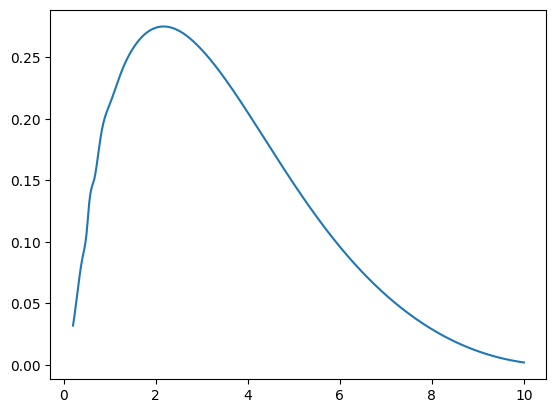

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

df_photon=pd.read_csv('data/photon_spectrum.csv',delim_whitespace=True)
df_lead=pd.read_csv('data/lead_atteunation.csv',delim_whitespace=True)

energy_data,density_data=df_photon.T.values
photon_f=interp1d(energy_data,density_data,kind="cubic")
energy_interp=np.linspace(min(energy_data),max(energy_data),1000)
density_interp=photon_f(energy_interp)

plt.plot(energy_interp,density_interp,label='interpolated')

def quad_f_top(e):
    return e * photon_f(e)
         
quad_f_bottom=photon_f

def average_photon_energy(e1,e2):
    return quad(quad_f_top,e1,e2)[0]/quad(quad_f_bottom,e1,e2)[0]

average_energy=average_photon_energy(min(energy_interp),max(density_interp))

print(f"The average photon energy is {average_energy} MeV.")


#### The mean photon energy of the beam after passing through solid led of depth x is $ \overline E(x)=\frac{(\int_{\infty}Ef(E)e^{-u(E)x}dx)}{(\int_{\infty}f(E)e^{-u(E)x}dx)} $